Topic:        Challenge Set 6

Subject:      Linear Learning

Date:         01/28/2018

Name:         Will Stokvis

Other Names: Brad Solomon, Matias, Brad Davies

### Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

* quadratic (second degree polynomial)
* logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
np.random.seed(5)

In [3]:
b0, b1 = 1.,5.
x = np.abs(np.random.normal(loc=0, scale=40, size=20000))
y = b0 + b1 * np.log(x) + np.random.randn(x.size)

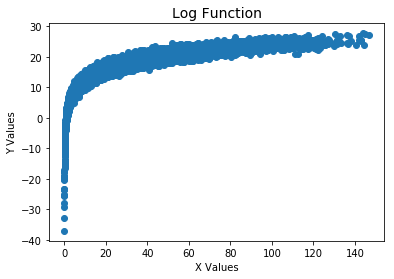

In [4]:
plt.scatter(x,y, marker = 'o')
plt.title('Log Function', fontsize = 14)
plt.xlabel('X Values')
plt.ylabel('Y Values');

In [5]:
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS

##### Quadratic

In [6]:
quad = add_constant(np.stack((x, x**2),axis =1))
model = OLS(endog=y, exog=quad)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                 4.029e+04
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        18:06:31   Log-Likelihood:                -46925.
No. Observations:               20000   AIC:                         9.386e+04
Df Residuals:                   19997   BIC:                         9.388e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8722      0.040    169.918      0.000       6.793       6.951
x1             0.4328      0.002    203.119      0.000       0.429       0.437
x2            -0.0028   2.28e-05   -121.376      0.000      -0.003      -0.003
==============================================================================
Omnibus:                    16769.915   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043466.039
Skew:                          -3.660   Prob(JB):                         0.00
Kurtosis:                      37.621   Cond. No.                     6.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Log

In [7]:
logX = add_constant(np.stack((x, np.log(x)), axis=1))
model = OLS(endog=y,exog=logX)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.109e+05
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        18:06:47   Log-Likelihood:                -28392.
No. Observations:               20000   AIC:                         5.679e+04
Df Residuals:                   19997   BIC:                         5.681e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9641      0.024     40.684      0.000       0.918       1.011
x1            -0.0004      0.001     -0.696      0.487      -0.001       0.001
x2             5.0147      0.011    449.013      0.000       4.993       5.037
==============================================================================
Omnibus:                        3.140   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.124
Skew:                           0.020   Prob(JB):                        0.210
Kurtosis:                       2.954   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [8]:
b0, b1, b2 = 20., 10., 5.
y1 = b0 + b1*x + b2*x**2 + np.random.randn(x.size)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

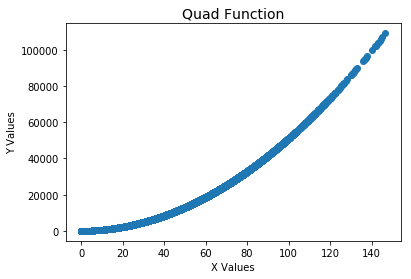

In [10]:
plt.scatter(x,y1, marker = 'o')
plt.title('Quad Function', fontsize = 14)
plt.xlabel('X Values')
plt.ylabel('Y Values');

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y1)
model = OLS(X_train, Y_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 9.109e+04
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        18:07:16   Log-Likelihood:                -61939.
No. Observations:               15000   AIC:                         1.239e+05
Df Residuals:                   14999   BIC:                         1.239e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0026   8.64e-06    301.809      0.000       0.003       0.003
==============================================================================
Omnibus:                    14239.878   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           762507.845
Skew:                          -4.574   Prob(JB):                         0.00
Kurtosis:                      36.709   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
train_mse = mean_squared_error(Y_train, model.predict(X_train))
test_mse = mean_squared_error(Y_test, model.predict(X_test))

In [13]:
print(train_mse, test_mse)

202008571.25 203438455.703


### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

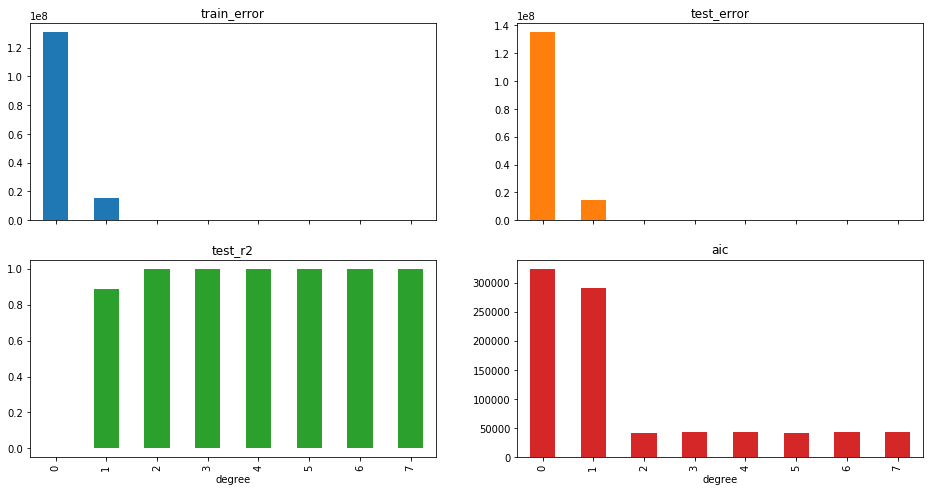

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

degrees = []
train_mses = []
test_mses = []
test_r2s = []
aics = []

for deg in range(0,8):
    poly = PolynomialFeatures(deg)
    if x.ndim == 1:
        x = x[:, None]
    xpoly = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(xpoly, y1)

    model = OLS(y_train, X_train).fit()
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    
    aics.append(model.aic)
    test_r2s.append(r2_score(y_test, model.predict(X_test)))
    test_mses.append(test_mse)
    train_mses.append(train_mse)
    degrees.append(deg)

    
    
degree_fit_results = pd.DataFrame(list(zip(degrees, train_mses, test_mses, test_r2s, aics)), columns=['degree','train_error','test_error','test_r2','aic']).set_index('degree')
degree_fit_results.plot.bar(subplots=True, layout=(2,2), figsize=(16,8),legend=False);